# Columbus Data Science Meetup
# Regression, Toy Example
## Charles Carter
## adapted from Numerical Python by Robert Johansson
### November 8, 2022

## Regression steps

1. Acquire and clean data.
1. Build a regression formula.
1. Create a model.
1. Fit the model --- this performs the computations.
1. Examine summary statistics.
1. Analyze the results.
1. If necessary, revise the formula, create another model and fit, and continue with analysis. Rinse and repeat.
1. Create explanatory visualizations.

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(123456789)
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)
data = pd.DataFrame({"x1": x1, "x2": x2})
data.head()

,x1,x2
0,2.212902,-0.474588
1,2.128398,-1.524772
2,1.841711,-1.939271
3,0.082382,0.345148
4,0.858964,-0.621523


In [3]:
def y_true(x1, x2):
    return 1  + 2 * x1 + 3 * x2 + 4 * x1 * x2
data["y_true"] = y_true(x1, x2)
data.head()

,x1,x2,y_true
0,2.212902,-0.474588,-0.198823
1,2.128398,-1.524772,-12.298805
2,1.841711,-1.939271,-15.420705
3,0.082382,0.345148,2.313945
4,0.858964,-0.621523,-1.282107


In [4]:
e = np.random.randn(N)
data["y"] = data["y_true"] + e
data.head()

,x1,x2,y_true,y
0,2.212902,-0.474588,-0.198823,-1.452775
1,2.128398,-1.524772,-12.298805,-12.560965
2,1.841711,-1.939271,-15.420705,-14.715090
3,0.082382,0.345148,2.313945,1.190283
4,0.858964,-0.621523,-1.282107,0.307772


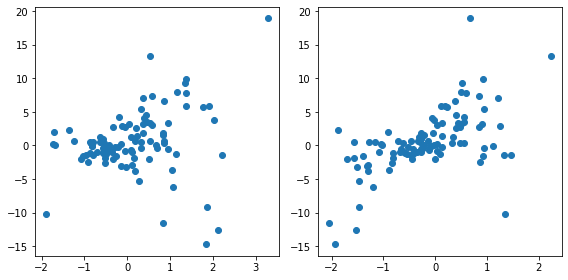

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].scatter(data["x1"], data["y"])
axes[1].scatter(data["x2"], data["y"])

fig.tight_layout()

In [6]:
model01 = smf.ols("y ~ x1", data)
result01 = model01.fit()
print(result01.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     5.709
Date:                Tue, 08 Nov 2022   Prob (F-statistic):             0.0188
Time:                        14:08:38   Log-Likelihood:                -292.62
No. Observations:                 100   AIC:                             589.2
Df Residuals:                      98   BIC:                             594.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4176      0.459      0.909      0.3

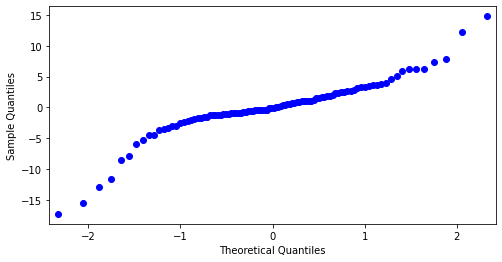

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result01.resid, ax=ax);

In [8]:
model02 = smf.ols("y ~ x2", data)
result02 = model02.fit()
print(result02.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     48.57
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           3.72e-10
Time:                        14:08:43   Log-Likelihood:                -275.32
No. Observations:                 100   AIC:                             554.6
Df Residuals:                      98   BIC:                             559.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1180      0.392      2.851      0.0

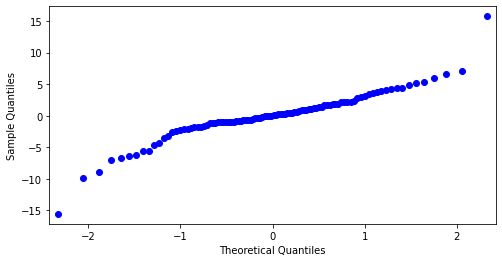

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result02.resid, ax=ax);

In [10]:
model03 = smf.ols("y ~ x1 + x2", data)
result03 = model03.fit()
print(result03.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     29.76
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           8.36e-11
Time:                        14:08:44   Log-Likelihood:                -271.52
No. Observations:                 100   AIC:                             549.0
Df Residuals:                      97   BIC:                             556.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9868      0.382      2.581      0.0

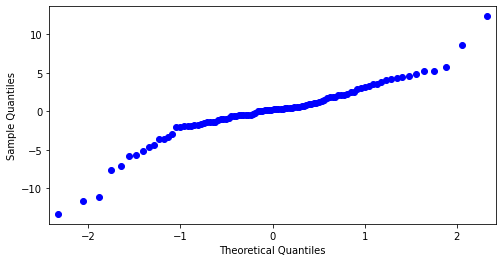

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result03.resid, ax=ax);

In [12]:
model04 = smf.ols("y ~ x1 + x2 + x1*x2", data)
result04 = model04.fit()
print(result04.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     684.5
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.21e-64
Time:                        14:08:46   Log-Likelihood:                -140.01
No. Observations:                 100   AIC:                             288.0
Df Residuals:                      96   BIC:                             298.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8706      0.103      8.433      0.0

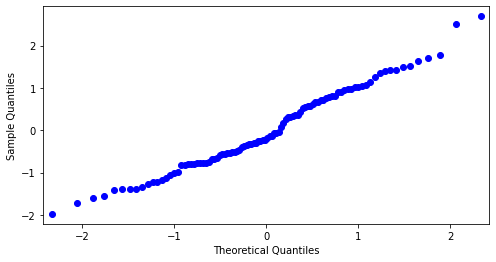

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result04.resid, ax=ax);

In [14]:
print("Model 1 R squared is", result01.rsquared)
print("Model 1 R squared is", result02.rsquared)
print("Model 2 R squared is", result03.rsquared)
print("Model 4 R squared is", result04.rsquared)

Model 1 R squared is 0.0550440360122354
Model 1 R squared is 0.33136892222412584
Model 2 R squared is 0.3802538325513254
Model 4 R squared is 0.9553393745884368
